In [159]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [160]:
wm6 = pd.read_csv('D:\\big data analytics\\lab work\\LaqnData_OxfordRd_d.csv')
wm6.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WM6,NO,01/01/2018 00:00,55.9,ug m-3,R
1,WM6,NO,01/01/2018 00:15,56.4,ug m-3,R
2,WM6,NO,01/01/2018 00:30,55.5,ug m-3,R
3,WM6,NO,01/01/2018 00:45,69.1,ug m-3,R
4,WM6,NO,01/01/2018 01:00,34.7,ug m-3,R


In [161]:
#to check any null data present in the file.
wm6.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                       True
Units                      False
Provisional or Ratified    False
dtype: bool

In [162]:
#dropping the null values because filling the null spaces with mean value may affect the output and for that we need a domain approval
#there may be specific reasons to not to collect the data on that particular time
#so dropping is the only way for me handle the missing data which would not affect the final output 
wm6_dropped=wm6.dropna()
wm6_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WM6,NO,01/01/2018 00:00,55.9,ug m-3,R
1,WM6,NO,01/01/2018 00:15,56.4,ug m-3,R
2,WM6,NO,01/01/2018 00:30,55.5,ug m-3,R
3,WM6,NO,01/01/2018 00:45,69.1,ug m-3,R
4,WM6,NO,01/01/2018 01:00,34.7,ug m-3,R


In [163]:
wm6_dropped.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                      False
Units                      False
Provisional or Ratified    False
dtype: bool

In [164]:
wm6_dropped.shape

(101218, 6)

In [165]:
#dropping the negative values because it may affect when finding averages and relatively low propotion of negative values
#sometimes the instrument fault may result in negative values
# so ignoring negative values now
wm6_dropped=wm6_dropped[(wm6_dropped['Value']>0)]
wm6_dropped.shape

(101201, 6)

In [166]:
wm6_drop_new=wm6_dropped.drop_duplicates()
wm6_drop_new.shape

(101201, 6)

In [167]:
#changing the units columns data into standard representation since pollutant matter is caluculated as microgram per cubic meter.
wm6_drop_new.replace({'ug m-3':'ug/m3', 'ug m -3 as NO 2':'ug/m3 as NO', 'ug m-3 as NO 2':'ug/m3 as NO', 'ug m-3 as NO2':'ug/m3 as NO2', 'ug m-3 reference equiv by VCM':'ug/m3 reference equiv by VCM'}, inplace=True)
wm6_drop_new.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WM6,NO,01/01/2018 00:00,55.9,ug/m3,R
1,WM6,NO,01/01/2018 00:15,56.4,ug/m3,R
2,WM6,NO,01/01/2018 00:30,55.5,ug/m3,R
3,WM6,NO,01/01/2018 00:45,69.1,ug/m3,R
4,WM6,NO,01/01/2018 01:00,34.7,ug/m3,R


In [168]:
wm6_drop_new['ReadingDateTime'] = pd.to_datetime(wm6_drop_new['ReadingDateTime'], format='%d/%m/%Y %H:%M')
wm6_drop_new['Time'] = [d.time() for d in wm6_drop_new['ReadingDateTime']]
wm6_drop_new.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
0,WM6,NO,2018-01-01 00:00:00,55.9,ug/m3,R,00:00:00
1,WM6,NO,2018-01-01 00:15:00,56.4,ug/m3,R,00:15:00
2,WM6,NO,2018-01-01 00:30:00,55.5,ug/m3,R,00:30:00
3,WM6,NO,2018-01-01 00:45:00,69.1,ug/m3,R,00:45:00
4,WM6,NO,2018-01-01 01:00:00,34.7,ug/m3,R,01:00:00


In [169]:
wm6_drop_new['day'] = wm6_drop_new['ReadingDateTime'].dt.weekday_name
wm6_drop_new.shape

(101201, 8)

In [170]:
wm6_drop_new = wm6_drop_new.set_index("day")
wm6_drop_new.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Monday,WM6,NO,2018-01-01 00:00:00,55.9,ug/m3,R,00:00:00
Monday,WM6,NO,2018-01-01 00:15:00,56.4,ug/m3,R,00:15:00
Monday,WM6,NO,2018-01-01 00:30:00,55.5,ug/m3,R,00:30:00
Monday,WM6,NO,2018-01-01 00:45:00,69.1,ug/m3,R,00:45:00
Monday,WM6,NO,2018-01-01 01:00:00,34.7,ug/m3,R,01:00:00


In [171]:
wm6_drop_new = wm6_drop_new.drop("Saturday", axis=0)

In [172]:
wm6_drop_new = wm6_drop_new.drop("Sunday", axis=0)

In [173]:
wm6_drop_new.shape

(72606, 7)

In [174]:
wm6_new_mon_fri=wm6_drop_new.reset_index()
wm6_new_mon_fri.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
0,Monday,WM6,NO,2018-01-01 00:00:00,55.9,ug/m3,R,00:00:00
1,Monday,WM6,NO,2018-01-01 00:15:00,56.4,ug/m3,R,00:15:00
2,Monday,WM6,NO,2018-01-01 00:30:00,55.5,ug/m3,R,00:30:00
3,Monday,WM6,NO,2018-01-01 00:45:00,69.1,ug/m3,R,00:45:00
4,Monday,WM6,NO,2018-01-01 01:00:00,34.7,ug/m3,R,01:00:00


In [175]:
wm6_drop_sat=wm6_new_mon_fri[wm6_new_mon_fri.day == 'Saturday']
wm6_drop_sat.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time


In [176]:
wm6_drop_sun=wm6_new_mon_fri[wm6_new_mon_fri.day =='Sunday']
wm6_drop_sun.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time


In [177]:
wm6_new_mon_fri['ReadingDateTime'] = pd.DatetimeIndex(wm6_new_mon_fri['ReadingDateTime'])
wm6_new_mon_fri = wm6_new_mon_fri.set_index('ReadingDateTime')
wm6_new_mon_fri.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 00:00:00,Monday,WM6,NO,55.9,ug/m3,R,00:00:00
2018-01-01 00:15:00,Monday,WM6,NO,56.4,ug/m3,R,00:15:00
2018-01-01 00:30:00,Monday,WM6,NO,55.5,ug/m3,R,00:30:00
2018-01-01 00:45:00,Monday,WM6,NO,69.1,ug/m3,R,00:45:00
2018-01-01 01:00:00,Monday,WM6,NO,34.7,ug/m3,R,01:00:00


In [178]:
wm6_between_time1 = wm6_new_mon_fri.between_time('00:00', '8:50')
wm6_between_time1.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 00:00:00,Monday,WM6,NO,55.9,ug/m3,R,00:00:00
2018-01-01 00:15:00,Monday,WM6,NO,56.4,ug/m3,R,00:15:00
2018-01-01 00:30:00,Monday,WM6,NO,55.5,ug/m3,R,00:30:00
2018-01-01 00:45:00,Monday,WM6,NO,69.1,ug/m3,R,00:45:00
2018-01-01 01:00:00,Monday,WM6,NO,34.7,ug/m3,R,01:00:00


In [78]:
wm6_between_time1.tail()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-12-31 07:45:00,Monday,WM6,PM10,13.4,ug/m3,P,07:45:00
2018-12-31 08:00:00,Monday,WM6,PM10,9.7,ug/m3,P,08:00:00
2018-12-31 08:15:00,Monday,WM6,PM10,9.7,ug/m3,P,08:15:00
2018-12-31 08:30:00,Monday,WM6,PM10,9.7,ug/m3,P,08:30:00
2018-12-31 08:45:00,Monday,WM6,PM10,9.7,ug/m3,P,08:45:00


In [115]:
wm6_between_time2 = wm6_new_mon_fri.between_time('17:10', '23:45')
wm6_between_time2.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 17:15:00,Monday,WM6,NO,230.60001,ug/m3,R,17:15:00
2018-01-01 17:30:00,Monday,WM6,NO,236.89999,ug/m3,R,17:30:00
2018-01-01 17:45:00,Monday,WM6,NO,238.20000,ug/m3,R,17:45:00
2018-01-01 18:00:00,Monday,WM6,NO,206.39999,ug/m3,R,18:00:00
2018-01-01 18:15:00,Monday,WM6,NO,185.10001,ug/m3,R,18:15:00


In [80]:
wm6_between_time2.tail()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-12-31 22:45:00,Monday,WM6,PM10,23.9,ug/m3,P,22:45:00
2018-12-31 23:00:00,Monday,WM6,PM10,22.3,ug/m3,P,23:00:00
2018-12-31 23:15:00,Monday,WM6,PM10,22.3,ug/m3,P,23:15:00
2018-12-31 23:30:00,Monday,WM6,PM10,22.3,ug/m3,P,23:30:00
2018-12-31 23:45:00,Monday,WM6,PM10,22.3,ug/m3,P,23:45:00


In [179]:
#wm6_between_time_merged=pd.merge(wm6_between_time1, wm6_between_time2, how='outer')
#wm6_between_time_merged.head()

In [180]:
wm6_bet_time=pd.concat([wm6_between_time1,wm6_between_time2])
wm6_bet_time.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 00:00:00,Monday,WM6,NO,55.9,ug/m3,R,00:00:00
2018-01-01 00:15:00,Monday,WM6,NO,56.4,ug/m3,R,00:15:00
2018-01-01 00:30:00,Monday,WM6,NO,55.5,ug/m3,R,00:30:00
2018-01-01 00:45:00,Monday,WM6,NO,69.1,ug/m3,R,00:45:00
2018-01-01 01:00:00,Monday,WM6,NO,34.7,ug/m3,R,01:00:00


In [181]:
wm6_bet_time.tail()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-12-31 22:45:00,Monday,WM6,PM10,23.9,ug/m3,P,22:45:00
2018-12-31 23:00:00,Monday,WM6,PM10,22.3,ug/m3,P,23:00:00
2018-12-31 23:15:00,Monday,WM6,PM10,22.3,ug/m3,P,23:15:00
2018-12-31 23:30:00,Monday,WM6,PM10,22.3,ug/m3,P,23:30:00
2018-12-31 23:45:00,Monday,WM6,PM10,22.3,ug/m3,P,23:45:00


In [182]:
wm6_res_index=wm6_bet_time.reset_index()
wm6_res_index.head()

,ReadingDateTime,day,Site,Species,Value,Units,Provisional or Ratified,Time
0,2018-01-01 00:00:00,Monday,WM6,NO,55.9,ug/m3,R,00:00:00
1,2018-01-01 00:15:00,Monday,WM6,NO,56.4,ug/m3,R,00:15:00
2,2018-01-01 00:30:00,Monday,WM6,NO,55.5,ug/m3,R,00:30:00
3,2018-01-01 00:45:00,Monday,WM6,NO,69.1,ug/m3,R,00:45:00
4,2018-01-01 01:00:00,Monday,WM6,NO,34.7,ug/m3,R,01:00:00


In [185]:
wm6_dropped['ReadingDateTime'] = pd.to_datetime(wm6_dropped['ReadingDateTime'], format='%d/%m/%Y %H:%M')
wm6_dropped['Time'] = [d.time() for d in wm6_dropped['ReadingDateTime']]
wm6_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
0,WM6,NO,2018-01-01 00:00:00,55.9,ug m-3,R,00:00:00
1,WM6,NO,2018-01-01 00:15:00,56.4,ug m-3,R,00:15:00
2,WM6,NO,2018-01-01 00:30:00,55.5,ug m-3,R,00:30:00
3,WM6,NO,2018-01-01 00:45:00,69.1,ug m-3,R,00:45:00
4,WM6,NO,2018-01-01 01:00:00,34.7,ug m-3,R,01:00:00


In [186]:
wm6_dropped['day'] = wm6_dropped['ReadingDateTime'].dt.weekday_name
wm6_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time,day
0,WM6,NO,2018-01-01 00:00:00,55.9,ug m-3,R,00:00:00,Monday
1,WM6,NO,2018-01-01 00:15:00,56.4,ug m-3,R,00:15:00,Monday
2,WM6,NO,2018-01-01 00:30:00,55.5,ug m-3,R,00:30:00,Monday
3,WM6,NO,2018-01-01 00:45:00,69.1,ug m-3,R,00:45:00,Monday
4,WM6,NO,2018-01-01 01:00:00,34.7,ug m-3,R,01:00:00,Monday


In [187]:
wm6_dropped = wm6_dropped.set_index("day")
wm6_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Monday,WM6,NO,2018-01-01 00:00:00,55.9,ug m-3,R,00:00:00
Monday,WM6,NO,2018-01-01 00:15:00,56.4,ug m-3,R,00:15:00
Monday,WM6,NO,2018-01-01 00:30:00,55.5,ug m-3,R,00:30:00
Monday,WM6,NO,2018-01-01 00:45:00,69.1,ug m-3,R,00:45:00
Monday,WM6,NO,2018-01-01 01:00:00,34.7,ug m-3,R,01:00:00


In [188]:
wm6_dropped = wm6_dropped.drop("Monday", axis=0)
wm6_dropped = wm6_dropped.drop("Tuesday", axis=0)
wm6_dropped = wm6_dropped.drop("Wednesday", axis=0)
wm6_dropped = wm6_dropped.drop("Thursday", axis=0)
wm6_dropped = wm6_dropped.drop("Friday", axis=0)

In [191]:
wm6_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Saturday,WM6,NO,2018-01-06 00:00:00,106.80000,ug m-3,R,00:00:00
Saturday,WM6,NO,2018-01-06 00:15:00,174.50000,ug m-3,R,00:15:00
Saturday,WM6,NO,2018-01-06 00:30:00,167.10001,ug m-3,R,00:30:00
Saturday,WM6,NO,2018-01-06 00:45:00,182.10001,ug m-3,R,00:45:00
Saturday,WM6,NO,2018-01-06 01:00:00,171.39999,ug m-3,R,01:00:00


In [192]:
wm6_sat_sun = wm6_dropped.reset_index()
wm6_sat_sun.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
0,Saturday,WM6,NO,2018-01-06 00:00:00,106.80000,ug m-3,R,00:00:00
1,Saturday,WM6,NO,2018-01-06 00:15:00,174.50000,ug m-3,R,00:15:00
2,Saturday,WM6,NO,2018-01-06 00:30:00,167.10001,ug m-3,R,00:30:00
3,Saturday,WM6,NO,2018-01-06 00:45:00,182.10001,ug m-3,R,00:45:00
4,Saturday,WM6,NO,2018-01-06 01:00:00,171.39999,ug m-3,R,01:00:00


In [194]:
wm6_mon_sun = pd.concat([wm6_res_index, wm6_sat_sun])
wm6_mon_sun.head()

,Provisional or Ratified,ReadingDateTime,Site,Species,Time,Units,Value,day
0,R,2018-01-01 00:00:00,WM6,NO,00:00:00,ug/m3,55.9,Monday
1,R,2018-01-01 00:15:00,WM6,NO,00:15:00,ug/m3,56.4,Monday
2,R,2018-01-01 00:30:00,WM6,NO,00:30:00,ug/m3,55.5,Monday
3,R,2018-01-01 00:45:00,WM6,NO,00:45:00,ug/m3,69.1,Monday
4,R,2018-01-01 01:00:00,WM6,NO,01:00:00,ug/m3,34.7,Monday


In [197]:
wm6_mon_sun.tail()

,Provisional or Ratified,ReadingDateTime,Site,Species,Time,Units,Value,day
28590,P,2018-12-30 22:45:00,WM6,PM10,22:45:00,ug/m3,19.0,Sunday
28591,P,2018-12-30 23:00:00,WM6,PM10,23:00:00,ug/m3,14.1,Sunday
28592,P,2018-12-30 23:15:00,WM6,PM10,23:15:00,ug/m3,14.1,Sunday
28593,P,2018-12-30 23:30:00,WM6,PM10,23:30:00,ug/m3,14.1,Sunday
28594,P,2018-12-30 23:45:00,WM6,PM10,23:45:00,ug/m3,14.1,Sunday


In [198]:
wm6_modified=wm6_mon_sun[['Site','Species','Value','Units','Time']]
wm6_modified.head()

,Site,Species,Value,Units,Time
0,WM6,NO,55.9,ug/m3,00:00:00
1,WM6,NO,56.4,ug/m3,00:15:00
2,WM6,NO,55.5,ug/m3,00:30:00
3,WM6,NO,69.1,ug/m3,00:45:00
4,WM6,NO,34.7,ug/m3,01:00:00


In [199]:
wm6_modified.tail()

,Site,Species,Value,Units,Time
28590,WM6,PM10,19.0,ug/m3,22:45:00
28591,WM6,PM10,14.1,ug/m3,23:00:00
28592,WM6,PM10,14.1,ug/m3,23:15:00
28593,WM6,PM10,14.1,ug/m3,23:30:00
28594,WM6,PM10,14.1,ug/m3,23:45:00


In [200]:
#wm6_between_time_merged1.tail()

In [201]:
#wm6_between_time_merged.shape

In [202]:
#wm6_between_time_merged1=wm6_between_time_merged.drop_duplicates()

In [203]:
#wm6_between_time_merged1.shape

In [204]:
wa9 = pd.read_csv('D:\\big data analytics\\lab work\\LaqnData_Putney_d.csv')
wa9.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WA9,CO,01/01/2018 00:00,NaN,mg m-3,P
1,WA9,CO,01/01/2018 00:15,NaN,mg m-3,P
2,WA9,CO,01/01/2018 00:30,NaN,mg m-3,P
3,WA9,CO,01/01/2018 00:45,NaN,mg m-3,P
4,WA9,CO,01/01/2018 01:00,NaN,mg m-3,P


In [205]:
wa9.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                       True
Units                      False
Provisional or Ratified    False
dtype: bool

In [206]:
wa9_dropped=wa9.dropna()
wa9_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
38762,WA9,NO,08/02/2018 18:30,15.4,ug m-3,P
38763,WA9,NO,08/02/2018 18:45,14.1,ug m-3,P
38764,WA9,NO,08/02/2018 19:00,12.8,ug m-3,P
38765,WA9,NO,08/02/2018 19:15,10.2,ug m-3,P
38766,WA9,NO,08/02/2018 19:30,10.2,ug m-3,P


In [207]:
wa9_dropped.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                      False
Units                      False
Provisional or Ratified    False
dtype: bool

In [208]:
wa9_dropped.shape

(124197, 6)

In [209]:
wa9_dropped=wa9_dropped[(wa9_dropped['Value']>0)]
wa9_dropped.shape

(121274, 6)

In [210]:
wa9_drop_new=wa9_dropped.drop_duplicates()
wa9_drop_new.shape

(121274, 6)

In [211]:
wa9_drop_new.replace({'ug m-3':'ug/m3', 'ug m -3 as NO 2':'ug/m3 as NO', 'ug m-3 as NO 2':'ug/m3 as NO', 'ug m-3 as NO2':'ug/m3 as NO2', 'ug m-3 reference equiv by VCM':'ug/m3 reference equiv by VCM'}, inplace=True)
wa9_drop_new.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
38762,WA9,NO,08/02/2018 18:30,15.4,ug/m3,P
38763,WA9,NO,08/02/2018 18:45,14.1,ug/m3,P
38764,WA9,NO,08/02/2018 19:00,12.8,ug/m3,P
38765,WA9,NO,08/02/2018 19:15,10.2,ug/m3,P
38766,WA9,NO,08/02/2018 19:30,10.2,ug/m3,P


In [212]:
wa9_drop_new['ReadingDateTime'] = pd.to_datetime(wa9_drop_new['ReadingDateTime'], format='%d/%m/%Y %H:%M')
wa9_drop_new['Time'] = [d.time() for d in wa9_drop_new['ReadingDateTime']]
wa9_drop_new.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
38762,WA9,NO,2018-02-08 18:30:00,15.4,ug/m3,P,18:30:00
38763,WA9,NO,2018-02-08 18:45:00,14.1,ug/m3,P,18:45:00
38764,WA9,NO,2018-02-08 19:00:00,12.8,ug/m3,P,19:00:00
38765,WA9,NO,2018-02-08 19:15:00,10.2,ug/m3,P,19:15:00
38766,WA9,NO,2018-02-08 19:30:00,10.2,ug/m3,P,19:30:00


In [213]:
wa9_drop_new['day'] = wa9_drop_new['ReadingDateTime'].dt.weekday_name
wa9_drop_new.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time,day
38762,WA9,NO,2018-02-08 18:30:00,15.4,ug/m3,P,18:30:00,Thursday
38763,WA9,NO,2018-02-08 18:45:00,14.1,ug/m3,P,18:45:00,Thursday
38764,WA9,NO,2018-02-08 19:00:00,12.8,ug/m3,P,19:00:00,Thursday
38765,WA9,NO,2018-02-08 19:15:00,10.2,ug/m3,P,19:15:00,Thursday
38766,WA9,NO,2018-02-08 19:30:00,10.2,ug/m3,P,19:30:00,Thursday


In [214]:
wa9_drop_new = wa9_drop_new.set_index("day")
wa9_drop_new = wa9_drop_new.drop("Saturday", axis=0)

In [215]:
wa9_drop_new = wa9_drop_new.drop("Sunday", axis=0)
wa9_drop_new.shape

(86080, 7)

In [216]:
wa9_new_mon_fri=wa9_drop_new.reset_index()

In [217]:
wa9_drop_sat=wa9_new_mon_fri[wa9_new_mon_fri.day =='Saturday']
wa9_drop_sat.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time


In [218]:
wa9_drop_sun=wa9_new_mon_fri[wa9_new_mon_fri.day =='Sunday']
wa9_drop_sun.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time


In [219]:
wa9_new_mon_fri['ReadingDateTime'] = pd.DatetimeIndex(wa9_new_mon_fri['ReadingDateTime'])
wa9_new_mon_fri = wa9_new_mon_fri.set_index('ReadingDateTime')
wa9_new_mon_fri.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-02-08 18:30:00,Thursday,WA9,NO,15.4,ug/m3,P,18:30:00
2018-02-08 18:45:00,Thursday,WA9,NO,14.1,ug/m3,P,18:45:00
2018-02-08 19:00:00,Thursday,WA9,NO,12.8,ug/m3,P,19:00:00
2018-02-08 19:15:00,Thursday,WA9,NO,10.2,ug/m3,P,19:15:00
2018-02-08 19:30:00,Thursday,WA9,NO,10.2,ug/m3,P,19:30:00


In [220]:
wa9_between_time1 = wa9_new_mon_fri.between_time('00:00', '8:50')
wa9_between_time1.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-02-09 00:00:00,Friday,WA9,NO,5.1,ug/m3,P,00:00:00
2018-02-09 00:15:00,Friday,WA9,NO,3.8,ug/m3,P,00:15:00
2018-02-09 00:30:00,Friday,WA9,NO,2.6,ug/m3,P,00:30:00
2018-02-09 00:45:00,Friday,WA9,NO,2.6,ug/m3,P,00:45:00
2018-02-09 01:00:00,Friday,WA9,NO,2.6,ug/m3,P,01:00:00


In [221]:
wa9_between_time2 = wa9_new_mon_fri.between_time('17:10', '23:45')
wa9_between_time2.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-02-08 18:30:00,Thursday,WA9,NO,15.4,ug/m3,P,18:30:00
2018-02-08 18:45:00,Thursday,WA9,NO,14.1,ug/m3,P,18:45:00
2018-02-08 19:00:00,Thursday,WA9,NO,12.8,ug/m3,P,19:00:00
2018-02-08 19:15:00,Thursday,WA9,NO,10.2,ug/m3,P,19:15:00
2018-02-08 19:30:00,Thursday,WA9,NO,10.2,ug/m3,P,19:30:00


In [222]:
#wa9_between_time_merged=pd.merge(wa9_between_time1, wa9_between_time2, how='outer')
#wa9_between_time_merged.head()

In [223]:
#wa9_between_time_merged.tail()

In [224]:
#wa9_between_time_merged_dup=wa9_between_time_merged.drop_duplicates()
#wa9_between_time_merged_dup.head()

In [225]:
#wa9_between_time_merged_dup.tail()

In [226]:
wa9_bet_time=pd.concat([wa9_between_time1, wa9_between_time2])
wa9_bet_time.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-02-09 00:00:00,Friday,WA9,NO,5.1,ug/m3,P,00:00:00
2018-02-09 00:15:00,Friday,WA9,NO,3.8,ug/m3,P,00:15:00
2018-02-09 00:30:00,Friday,WA9,NO,2.6,ug/m3,P,00:30:00
2018-02-09 00:45:00,Friday,WA9,NO,2.6,ug/m3,P,00:45:00
2018-02-09 01:00:00,Friday,WA9,NO,2.6,ug/m3,P,01:00:00


In [227]:
wa9_bet_time.tail()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-12-31 22:45:00,Monday,WA9,PM10,13.0,ug/m3 reference equiv by VCM,P,22:45:00
2018-12-31 23:00:00,Monday,WA9,PM10,16.0,ug/m3 reference equiv by VCM,P,23:00:00
2018-12-31 23:15:00,Monday,WA9,PM10,17.0,ug/m3 reference equiv by VCM,P,23:15:00
2018-12-31 23:30:00,Monday,WA9,PM10,18.0,ug/m3 reference equiv by VCM,P,23:30:00
2018-12-31 23:45:00,Monday,WA9,PM10,13.0,ug/m3 reference equiv by VCM,P,23:45:00


In [228]:
wa9_res_index=wa9_bet_time.reset_index()
wa9_res_index.head()

,ReadingDateTime,day,Site,Species,Value,Units,Provisional or Ratified,Time
0,2018-02-09 00:00:00,Friday,WA9,NO,5.1,ug/m3,P,00:00:00
1,2018-02-09 00:15:00,Friday,WA9,NO,3.8,ug/m3,P,00:15:00
2,2018-02-09 00:30:00,Friday,WA9,NO,2.6,ug/m3,P,00:30:00
3,2018-02-09 00:45:00,Friday,WA9,NO,2.6,ug/m3,P,00:45:00
4,2018-02-09 01:00:00,Friday,WA9,NO,2.6,ug/m3,P,01:00:00


In [229]:
wa9_dropped['ReadingDateTime'] = pd.to_datetime(wa9_dropped['ReadingDateTime'], format='%d/%m/%Y %H:%M')
wa9_dropped['Time'] = [d.time() for d in wa9_dropped['ReadingDateTime']]
wa9_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
38762,WA9,NO,2018-02-08 18:30:00,15.4,ug m-3,P,18:30:00
38763,WA9,NO,2018-02-08 18:45:00,14.1,ug m-3,P,18:45:00
38764,WA9,NO,2018-02-08 19:00:00,12.8,ug m-3,P,19:00:00
38765,WA9,NO,2018-02-08 19:15:00,10.2,ug m-3,P,19:15:00
38766,WA9,NO,2018-02-08 19:30:00,10.2,ug m-3,P,19:30:00


In [230]:
wa9_dropped['day'] = wa9_dropped['ReadingDateTime'].dt.weekday_name
wa9_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time,day
38762,WA9,NO,2018-02-08 18:30:00,15.4,ug m-3,P,18:30:00,Thursday
38763,WA9,NO,2018-02-08 18:45:00,14.1,ug m-3,P,18:45:00,Thursday
38764,WA9,NO,2018-02-08 19:00:00,12.8,ug m-3,P,19:00:00,Thursday
38765,WA9,NO,2018-02-08 19:15:00,10.2,ug m-3,P,19:15:00,Thursday
38766,WA9,NO,2018-02-08 19:30:00,10.2,ug m-3,P,19:30:00,Thursday


In [231]:
wa9_dropped = wa9_dropped.set_index("day")
wa9_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Thursday,WA9,NO,2018-02-08 18:30:00,15.4,ug m-3,P,18:30:00
Thursday,WA9,NO,2018-02-08 18:45:00,14.1,ug m-3,P,18:45:00
Thursday,WA9,NO,2018-02-08 19:00:00,12.8,ug m-3,P,19:00:00
Thursday,WA9,NO,2018-02-08 19:15:00,10.2,ug m-3,P,19:15:00
Thursday,WA9,NO,2018-02-08 19:30:00,10.2,ug m-3,P,19:30:00


In [233]:
wa9_dropped = wa9_dropped.drop("Monday", axis=0)
wa9_dropped = wa9_dropped.drop("Tuesday", axis=0)
wa9_dropped = wa9_dropped.drop("Wednesday", axis=0)
wa9_dropped = wa9_dropped.drop("Thursday", axis=0)
wa9_dropped = wa9_dropped.drop("Friday", axis=0)

In [236]:
wa9_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Saturday,WA9,NO,2018-02-10 00:00:00,2.6,ug m-3,P,00:00:00
Saturday,WA9,NO,2018-02-10 00:15:00,3.8,ug m-3,P,00:15:00
Saturday,WA9,NO,2018-02-10 00:30:00,11.5,ug m-3,P,00:30:00
Saturday,WA9,NO,2018-02-10 00:45:00,5.1,ug m-3,P,00:45:00
Saturday,WA9,NO,2018-02-10 01:00:00,6.4,ug m-3,P,01:00:00


In [261]:
wa9_dropped.replace({'ug m-3':'ug/m3', 'ug m -3 as NO 2':'ug/m3 as NO', 'ug m-3 as NO 2':'ug/m3 as NO', 'ug m-3 as NO2':'ug/m3 as NO2', 'ug m-3 reference equiv by VCM':'ug/m3 reference equiv by VCM'}, inplace=True)
wa9_dropped.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Saturday,WA9,NO,2018-02-10 00:00:00,2.6,ug/m3,P,00:00:00
Saturday,WA9,NO,2018-02-10 00:15:00,3.8,ug/m3,P,00:15:00
Saturday,WA9,NO,2018-02-10 00:30:00,11.5,ug/m3,P,00:30:00
Saturday,WA9,NO,2018-02-10 00:45:00,5.1,ug/m3,P,00:45:00
Saturday,WA9,NO,2018-02-10 01:00:00,6.4,ug/m3,P,01:00:00


In [262]:
wa9_sat_sun = wa9_dropped.reset_index()
wa9_sat_sun.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
0,Saturday,WA9,NO,2018-02-10 00:00:00,2.6,ug/m3,P,00:00:00
1,Saturday,WA9,NO,2018-02-10 00:15:00,3.8,ug/m3,P,00:15:00
2,Saturday,WA9,NO,2018-02-10 00:30:00,11.5,ug/m3,P,00:30:00
3,Saturday,WA9,NO,2018-02-10 00:45:00,5.1,ug/m3,P,00:45:00
4,Saturday,WA9,NO,2018-02-10 01:00:00,6.4,ug/m3,P,01:00:00


In [263]:
wa9_mon_sun = pd.concat([wa9_res_index, wa9_sat_sun])
wa9_mon_sun.head()

,Provisional or Ratified,ReadingDateTime,Site,Species,Time,Units,Value,day
0,P,2018-02-09 00:00:00,WA9,NO,00:00:00,ug/m3,5.1,Friday
1,P,2018-02-09 00:15:00,WA9,NO,00:15:00,ug/m3,3.8,Friday
2,P,2018-02-09 00:30:00,WA9,NO,00:30:00,ug/m3,2.6,Friday
3,P,2018-02-09 00:45:00,WA9,NO,00:45:00,ug/m3,2.6,Friday
4,P,2018-02-09 01:00:00,WA9,NO,01:00:00,ug/m3,2.6,Friday


In [264]:
wa9_modified=wa9_mon_sun[['Site','Species','Value','Units','Time']]
wa9_modified.head()

,Site,Species,Value,Units,Time
0,WA9,NO,5.1,ug/m3,00:00:00
1,WA9,NO,3.8,ug/m3,00:15:00
2,WA9,NO,2.6,ug/m3,00:30:00
3,WA9,NO,2.6,ug/m3,00:45:00
4,WA9,NO,2.6,ug/m3,01:00:00


In [265]:
wm6_wa9_modified=pd.concat([wm6_modified,wa9_modified])
wm6_wa9_modified.head()

,Site,Species,Value,Units,Time
0,WM6,NO,55.9,ug/m3,00:00:00
1,WM6,NO,56.4,ug/m3,00:15:00
2,WM6,NO,55.5,ug/m3,00:30:00
3,WM6,NO,69.1,ug/m3,00:45:00
4,WM6,NO,34.7,ug/m3,01:00:00


In [266]:
wm6_wa9_modified.tail()

,Site,Species,Value,Units,Time
35189,WA9,PM10,10.0,ug/m3 reference equiv by VCM,22:45:00
35190,WA9,PM10,4.0,ug/m3 reference equiv by VCM,23:00:00
35191,WA9,PM10,6.0,ug/m3 reference equiv by VCM,23:15:00
35192,WA9,PM10,8.0,ug/m3 reference equiv by VCM,23:30:00
35193,WA9,PM10,6.0,ug/m3 reference equiv by VCM,23:45:00


In [339]:
# wa9_dropped['ReadingDateTime'] = pd.to_datetime(wa9_dropped['ReadingDateTime'], format='%d/%m/%Y %H:%M')
# wa9_dropped['Time'] = [d.time() for d in wa9_dropped['ReadingDateTime']]
# wa9_dropped.head()
wm6_wa9_modified['Hours']=pd.to_datetime(wm6_wa9_modified['Time'], format='%H:%M:%S').dt.hour

In [267]:
import seaborn as sns

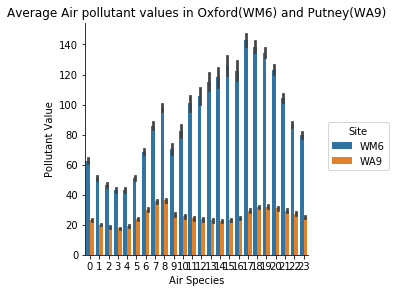

In [345]:
sns.factorplot(x="Hours", y="Value", hue="Site", kind="bar", data=wm6_wa9_modified)
plt.title('Average Air pollutant values in Oxford(WM6) and Putney(WA9)')
plt.xlabel('Air Species')
plt.ylabel('Pollutant Value')
plt.show()

In [269]:
wa9_wm6_sat_sun=pd.concat([wa9_sat_sun,wm6_sat_sun])
wa9_wm6_sat_sun.head()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
0,Saturday,WA9,NO,2018-02-10 00:00:00,2.6,ug/m3,P,00:00:00
1,Saturday,WA9,NO,2018-02-10 00:15:00,3.8,ug/m3,P,00:15:00
2,Saturday,WA9,NO,2018-02-10 00:30:00,11.5,ug/m3,P,00:30:00
3,Saturday,WA9,NO,2018-02-10 00:45:00,5.1,ug/m3,P,00:45:00
4,Saturday,WA9,NO,2018-02-10 01:00:00,6.4,ug/m3,P,01:00:00


In [270]:
wa9_wm6_sat_sun.tail()

,day,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
28590,Sunday,WM6,PM10,2018-12-30 22:45:00,19.0,ug/m3,P,22:45:00
28591,Sunday,WM6,PM10,2018-12-30 23:00:00,14.1,ug/m3,P,23:00:00
28592,Sunday,WM6,PM10,2018-12-30 23:15:00,14.1,ug/m3,P,23:15:00
28593,Sunday,WM6,PM10,2018-12-30 23:30:00,14.1,ug/m3,P,23:30:00
28594,Sunday,WM6,PM10,2018-12-30 23:45:00,14.1,ug/m3,P,23:45:00


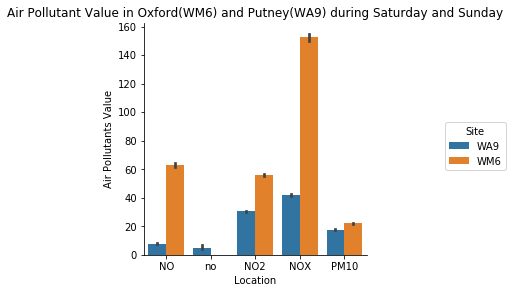

In [291]:
sns.factorplot(x="Species", y="Value", hue="Site", kind="bar", data=wa9_wm6_sat_sun)
plt.title('Air Pollutant Value in Oxford(WM6) and Putney(WA9) during Saturday and Sunday')
plt.xlabel('Location')
plt.ylabel('Air Pollutants Value')
plt.show()

In [300]:
wa9_wm6=pd.merge(wa9_mon_sun,wm6_mon_sun,how='inner',on=['ReadingDateTime','Species','day','Time'])
wa9_wm6.head()

,Provisional or Ratified_x,ReadingDateTime,Site_x,Species,Time,Units_x,Value_x,day,Provisional or Ratified_y,Site_y,Units_y,Value_y
0,P,2018-02-09 00:00:00,WA9,NO,00:00:00,ug/m3,5.1,Friday,R,WM6,ug/m3,24.5
1,P,2018-02-09 00:15:00,WA9,NO,00:15:00,ug/m3,3.8,Friday,R,WM6,ug/m3,27.3
2,P,2018-02-09 00:30:00,WA9,NO,00:30:00,ug/m3,2.6,Friday,R,WM6,ug/m3,16.6
3,P,2018-02-09 00:45:00,WA9,NO,00:45:00,ug/m3,2.6,Friday,R,WM6,ug/m3,18.4
4,P,2018-02-09 01:00:00,WA9,NO,01:00:00,ug/m3,2.6,Friday,R,WM6,ug/m3,20.7


In [301]:
wa9_wm6.tail()

,Provisional or Ratified_x,ReadingDateTime,Site_x,Species,Time,Units_x,Value_x,day,Provisional or Ratified_y,Site_y,Units_y,Value_y
68647,P,2018-12-30 22:45:00,WA9,PM10,22:45:00,ug/m3 reference equiv by VCM,10.0,Sunday,P,WM6,ug/m3,19.0
68648,P,2018-12-30 23:00:00,WA9,PM10,23:00:00,ug/m3 reference equiv by VCM,4.0,Sunday,P,WM6,ug/m3,14.1
68649,P,2018-12-30 23:15:00,WA9,PM10,23:15:00,ug/m3 reference equiv by VCM,6.0,Sunday,P,WM6,ug/m3,14.1
68650,P,2018-12-30 23:30:00,WA9,PM10,23:30:00,ug/m3 reference equiv by VCM,8.0,Sunday,P,WM6,ug/m3,14.1
68651,P,2018-12-30 23:45:00,WA9,PM10,23:45:00,ug/m3 reference equiv by VCM,6.0,Sunday,P,WM6,ug/m3,14.1


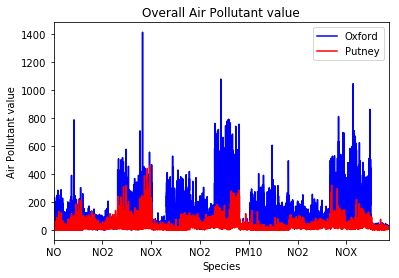

In [292]:
ax = plt.gca()

wa9_wm6.plot(kind='line',x='Species',y='Value_y', color='blue', ax=ax, label='Oxford')
wa9_wm6.plot(kind='line',x='Species',y='Value_x', color='red', ax=ax, label='Putney')
plt.title('Overall Air Pollutant value')
plt.ylabel('Air Pollutant value')
plt.xlabel('Species')
plt.show()

In [328]:
wm6_drop_new.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Time
day,,,,,,,
Monday,WM6,PM10,2018-12-31 22:45:00,23.9,ug/m3,P,22:45:00
Monday,WM6,PM10,2018-12-31 23:00:00,22.3,ug/m3,P,23:00:00
Monday,WM6,PM10,2018-12-31 23:15:00,22.3,ug/m3,P,23:15:00
Monday,WM6,PM10,2018-12-31 23:30:00,22.3,ug/m3,P,23:30:00
Monday,WM6,PM10,2018-12-31 23:45:00,22.3,ug/m3,P,23:45:00


In [309]:
wm6_new_mon_fri.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 00:00:00,Monday,WM6,NO,55.9,ug/m3,R,00:00:00
2018-01-01 00:15:00,Monday,WM6,NO,56.4,ug/m3,R,00:15:00
2018-01-01 00:30:00,Monday,WM6,NO,55.5,ug/m3,R,00:30:00
2018-01-01 00:45:00,Monday,WM6,NO,69.1,ug/m3,R,00:45:00
2018-01-01 01:00:00,Monday,WM6,NO,34.7,ug/m3,R,01:00:00


In [311]:
wm6_new_mon_fri_time1 = wm6_new_mon_fri.between_time('8:50','17:15')
wm6_new_mon_fri_time1.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 09:00:00,Monday,WM6,NO,40.7,ug/m3,R,09:00:00
2018-01-01 09:15:00,Monday,WM6,NO,26.5,ug/m3,R,09:15:00
2018-01-01 09:30:00,Monday,WM6,NO,45.6,ug/m3,R,09:30:00
2018-01-01 09:45:00,Monday,WM6,NO,97.6,ug/m3,R,09:45:00
2018-01-01 10:00:00,Monday,WM6,NO,95.6,ug/m3,R,10:00:00


In [324]:
wm6_new_mon_fri_time1.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-01-01 09:00:00,Monday,WM6,NO,40.7,ug/m3,R,09:00:00
2018-01-01 09:15:00,Monday,WM6,NO,26.5,ug/m3,R,09:15:00
2018-01-01 09:30:00,Monday,WM6,NO,45.6,ug/m3,R,09:30:00
2018-01-01 09:45:00,Monday,WM6,NO,97.6,ug/m3,R,09:45:00
2018-01-01 10:00:00,Monday,WM6,NO,95.6,ug/m3,R,10:00:00


In [325]:
wa9_new_mon_fri_time1 = wa9_new_mon_fri.between_time('8:50','17:15')
wa9_new_mon_fri_time1.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-02-09 09:00:00,Friday,WA9,NO,3.8,ug/m3,P,09:00:00
2018-02-09 09:15:00,Friday,WA9,NO,3.8,ug/m3,P,09:15:00
2018-02-09 09:30:00,Friday,WA9,NO,3.8,ug/m3,P,09:30:00
2018-02-09 09:45:00,Friday,WA9,NO,2.6,ug/m3,P,09:45:00
2018-02-09 10:00:00,Friday,WA9,NO,3.8,ug/m3,P,10:00:00


In [327]:
wa9_wm6_office=pd.concat([wa9_new_mon_fri_time1,wm6_new_mon_fri_time1])
wa9_wm6_office.head()

,day,Site,Species,Value,Units,Provisional or Ratified,Time
ReadingDateTime,,,,,,,
2018-02-09 09:00:00,Friday,WA9,NO,3.8,ug/m3,P,09:00:00
2018-02-09 09:15:00,Friday,WA9,NO,3.8,ug/m3,P,09:15:00
2018-02-09 09:30:00,Friday,WA9,NO,3.8,ug/m3,P,09:30:00
2018-02-09 09:45:00,Friday,WA9,NO,2.6,ug/m3,P,09:45:00
2018-02-09 10:00:00,Friday,WA9,NO,3.8,ug/m3,P,10:00:00


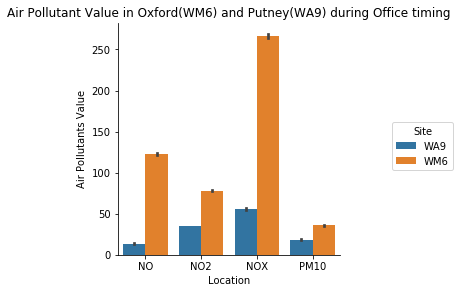

In [329]:
sns.factorplot(x="Species", y="Value", hue="Site", kind="bar", data=wa9_wm6_office)
plt.title('Air Pollutant Value in Oxford(WM6) and Putney(WA9) during Office timing')
plt.xlabel('Location')
plt.ylabel('Air Pollutants Value')
plt.show()